<a href="https://colab.research.google.com/github/ElaYJ/MachineLearning_Project/blob/main/olist_ecommerce_gh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
order_item = pd.read_csv("olist_order_items_dataset.csv")
order_payment = pd.read_csv("olist_order_payments_dataset.csv")
order_review = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
product_category = pd.read_csv("product_category_name_translation.csv")

In [4]:
# 날짜 데이터 타입 변경
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [5]:
# products에 있는 category_name을 product_category에 있는 product_category_name_english로 변형
product_category_dict = dict(zip(product_category['product_category_name'], product_category['product_category_name_english']))
products['product_category_name'] = products['product_category_name'].map(product_category_dict)

In [6]:
# A. orders와 customers 합치기
order_customer = pd.merge(orders[['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date']],customers[['customer_id','customer_unique_id','customer_state']],how='left',on='customer_id')

# A. payment 합치기
order_customer = pd.merge(order_customer,order_payment[['order_id','payment_value']],how='left',on='order_id')

# B. item과 products 합치기
order_product = pd.merge(order_item[['order_id','product_id']],products[['product_id','product_category_name']])

# A와 B 합치기
order_customer = pd.merge(order_customer,order_product,how='left',on='order_id')

# review 합치기
order_customer=pd.merge(order_customer,order_review[['order_id','review_score']],how='left',on='order_id')

# 연월일 칼럼 생성
order_customer['order_date'] = order_customer['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
order_customer.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_state,payment_value,product_id,product_category_name,review_score,order_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,18.12,87285b34884572647811a353c7ac498a,housewares,4.0,2017-10-02
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,2.00,87285b34884572647811a353c7ac498a,housewares,4.0,2017-10-02
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,SP,18.59,87285b34884572647811a353c7ac498a,housewares,4.0,2017-10-02
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,BA,141.46,595fac2a385ac33a80bd5114aec74eb8,perfumery,4.0,2018-07-24
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,GO,179.12,aa4383b373c6aca5d8797843e5594415,auto,5.0,2018-08-08


In [9]:
train = customers.groupby('customer_unique_id').agg({'customer_id':len}).rename(columns={'customer_id':'visit_cnt'})

train = train.reset_index()

train.head()

,customer_unique_id,visit_cnt
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [10]:
def revisit(visit_cnt):
  if visit_cnt ==1 :
    return False
  else :
    return True

In [11]:
from tqdm import tqdm

for i in tqdm(range(len(train['visit_cnt']))):
  train.loc[i,'revisit']=revisit(train['visit_cnt'][i])

100%|██████████| 96096/96096 [00:13<00:00, 7030.49it/s]


In [12]:
review_avg = order_customer.groupby('customer_unique_id').agg({'review_score':np.mean}).rename(columns={'review_score':'review_avg'})
review_avg = review_avg.reset_index()
train = pd.merge(train,review_avg,how='left',on='customer_unique_id')

train.head(3)

,customer_unique_id,visit_cnt,revisit,review_avg
0,0000366f3b9a7992bf8c76cfdf3221e2,1,False,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,False,4.0
2,0000f46a3911fa3c0805444483337064,1,False,3.0


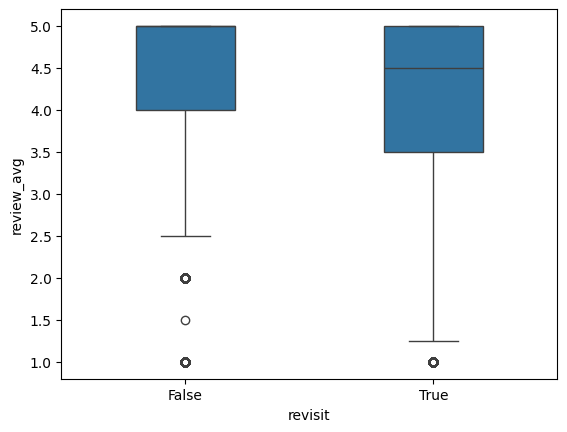

In [14]:
sns.boxplot(x='revisit',y='review_avg',data=train,width=0.4)

plt.show()

리뷰 스코어 자체가 재방문에 큰 영향은 미치지 못 했다.

In [15]:
payment_avg = order_customer.groupby('customer_unique_id').agg({'payment_value':np.mean}).rename(columns={'payment_value':'payment_avg'})
payment_avg = payment_avg.reset_index()
train = pd.merge(train,payment_avg,how='left',on='customer_unique_id')

train.head(3)

,customer_unique_id,visit_cnt,revisit,review_avg,payment_avg
0,0000366f3b9a7992bf8c76cfdf3221e2,1,False,5.0,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,False,4.0,27.19
2,0000f46a3911fa3c0805444483337064,1,False,3.0,86.22


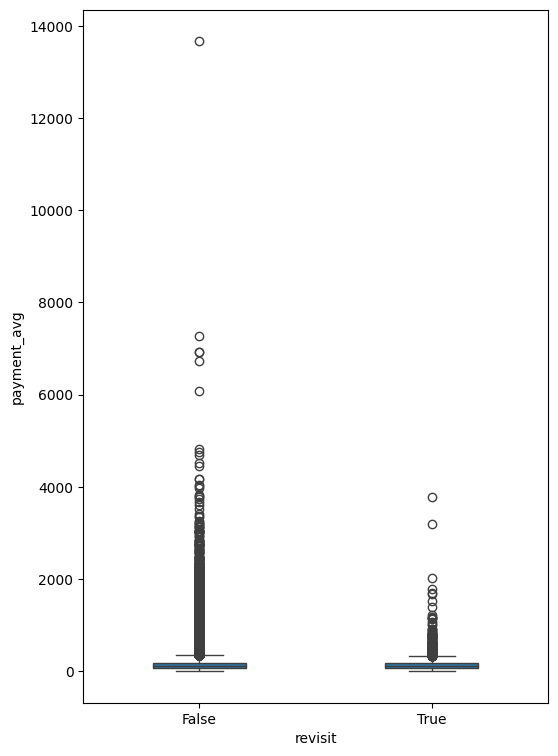

In [16]:
plt.figure(figsize=(6,9))
sns.boxplot(x='revisit',y='payment_avg',data=train,width=0.4)

plt.show()

재방문에 평균 구매액도 영향을 미치지 못한 것으로 보인다. 오히려 처음 극단적으로 산 사람이 재방문을 안하는 경우도 있는 것을 확인할 수 있다.

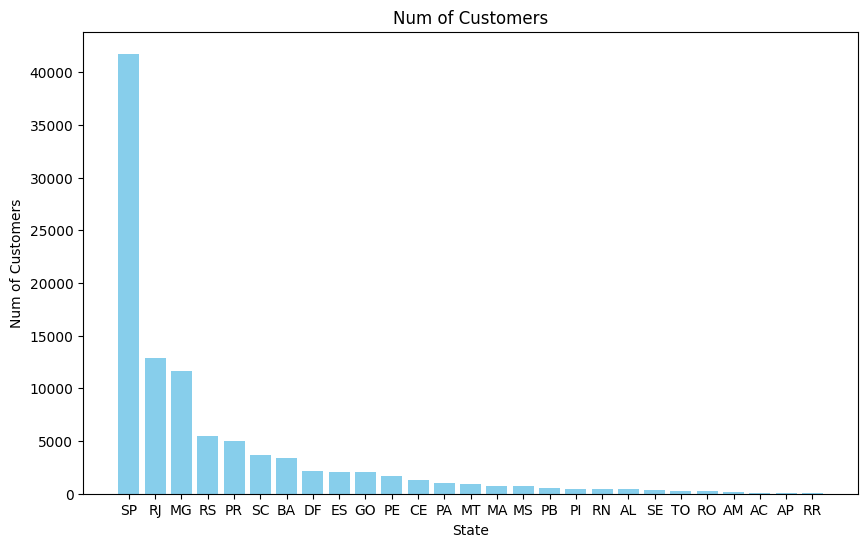

In [17]:
customer_state_group = customers.groupby('customer_state').agg({'customer_state':len}).rename(columns={'customer_state':'customer_cnt'})

# 내림차순 정렬
customer_state_group = customer_state_group.sort_values(by='customer_cnt', ascending=False)

# 막대그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(customer_state_group.index, customer_state_group['customer_cnt'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Num of Customers')
plt.title('Num of Customers')
plt.show()

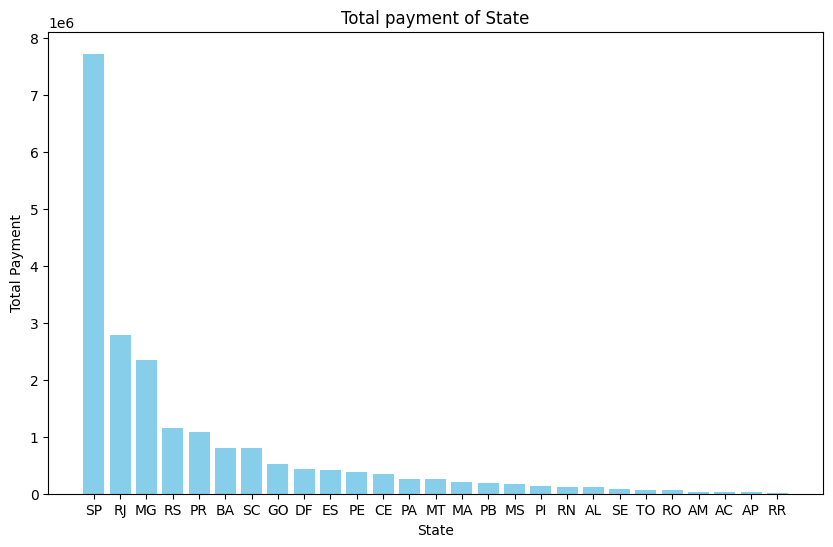

In [18]:
order_customer_state = order_customer.groupby('customer_state').agg({'payment_value':sum}).rename(columns={'payment_value':'total_payment_value'})

# 내림차순 정렬
order_customer_state = order_customer_state.sort_values(by='total_payment_value', ascending=False)

# 막대그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(order_customer_state.index, order_customer_state['total_payment_value'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Payment')
plt.title('Total payment of State')
plt.show()

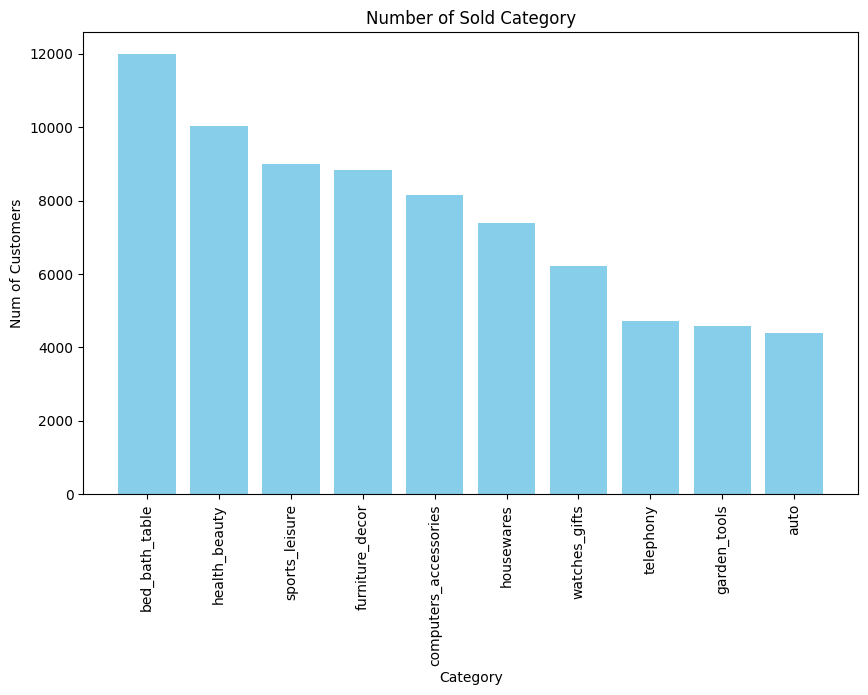

In [19]:
product_group = order_customer.groupby('product_category_name').agg({'customer_state':len}).rename(columns={'customer_state':'Numbers'})

# 내림차순 정렬
product_group = product_group.sort_values(by='Numbers', ascending=False)

# 상위 10개 판매건수 막대그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(product_group.index[:10], product_group['Numbers'][:10], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Num of Customers')
plt.title('Number of Sold Category')
plt.xticks(rotation=90)
plt.show()

연도별 차이 존재??

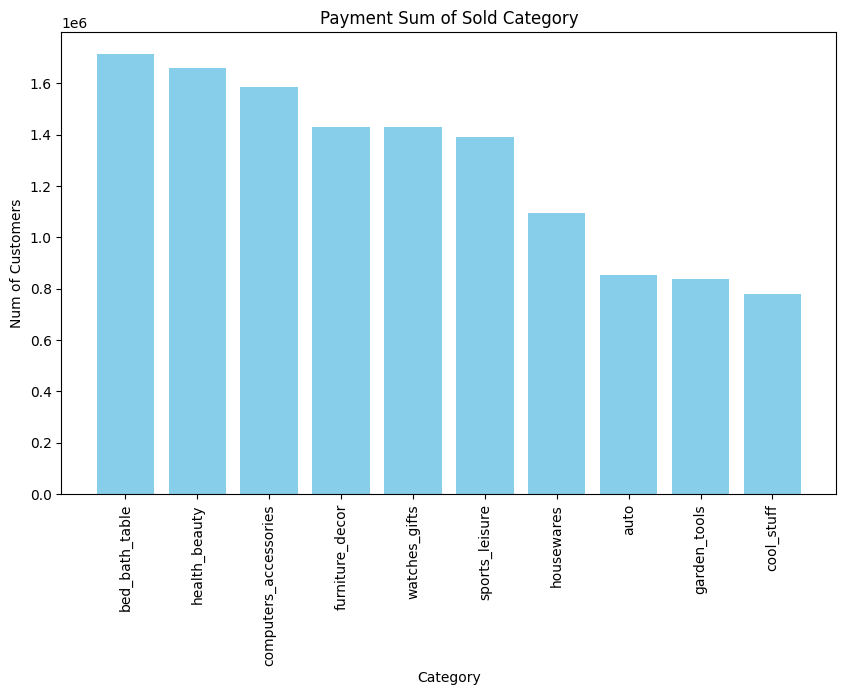

In [ ]:
product_group = order_customer.groupby('product_category_name').agg({'payment_value':sum}).rename(columns={'payment_value':'Numbers'})

# 내림차순 정렬
product_group = product_group.sort_values(by='Numbers', ascending=False)

# 상위 10개 판매건수 막대그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(product_group.index[:10], product_group['Numbers'][:10], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Num of Customers')
plt.title('Payment Sum of Sold Category')
plt.xticks(rotation=90)
plt.show()

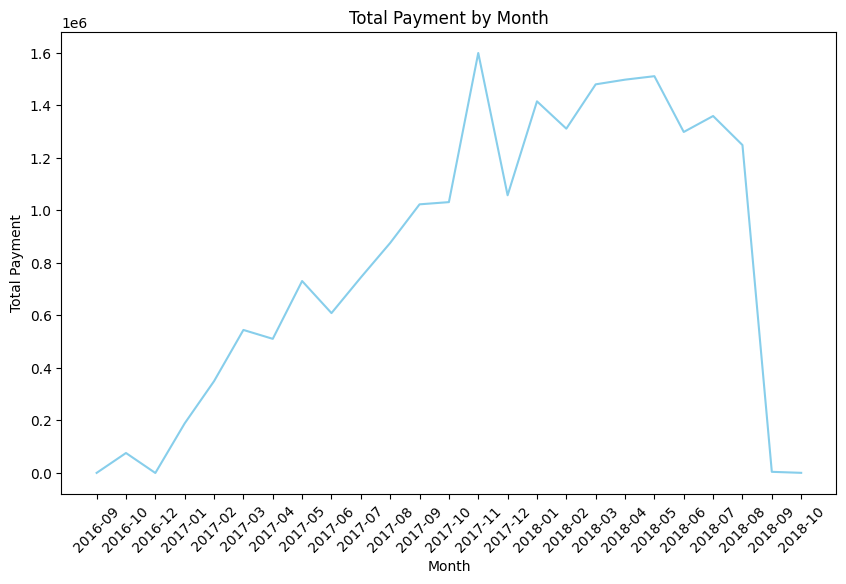

In [ ]:
# 연월 칼럼 생성
order_customer['order_month'] = order_customer['order_purchase_timestamp'].dt.strftime('%Y-%m')

# 연월별 결제 금액 합계 계산
monthly_sales = order_customer.groupby('order_month')['payment_value'].sum()

# 선 그래프 생성
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Payment')
plt.title('Total Payment by Month')
plt.xticks(rotation=45)
plt.show()


In [ ]:
order_customer.groupby('customer_id').agg({'order_date':len}).rename(columns={'order_date':'used_cnt'})

,used_cnt
customer_id,
00012a2ce6f8dcda20d059ce98491703,1
000161a058600d5901f007fab4c27140,1
0001fd6190edaaf884bcaf3d49edf079,1
0002414f95344307404f0ace7a26f1d5,1
000379cdec625522490c315e70c7a9fb,1
...,...
fffecc9f79fd8c764f843e9951b11341,3
fffeda5b6d849fbd39689bb92087f431,1
ffff42319e9b2d713724ae527742af25,1


In [ ]:
order_customer[order_customer['customer_id']=='fffecc9f79fd8c764f843e9951b11341']

,order_id,customer_id,order_purchase_timestamp,customer_state,payment_value,product_id,product_category_name,order_month,order_date
17899,814d6a3a7c0b32b2ad929ac6328124e9,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,RS,0.64,c045b19fdb30a3035c56d04c6fe2e622,bed_bath_table,2018-03,2018-03-29
17900,814d6a3a7c0b32b2ad929ac6328124e9,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,RS,9.49,c045b19fdb30a3035c56d04c6fe2e622,bed_bath_table,2018-03,2018-03-29
17901,814d6a3a7c0b32b2ad929ac6328124e9,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,RS,71.23,c045b19fdb30a3035c56d04c6fe2e622,bed_bath_table,2018-03,2018-03-29


In [58]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [59]:
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
